In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

# This is how I got latex to work on Midway, may be different on NERSC

# os.system('module load texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

mpl.rcParams.update({'font.size': 15})

# mpl.rcParams['mathtext.fontset'] = 'stix'
#plt.rc('text.latex', preamble=r'\usepackage{/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/nulltests_txpipe/apjfonts}')
        
plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'

In [11]:
hsc_path = "HSCY3_MATCH_BANDi.csv"
kids_path = "KIDS_MATCH_BANDr.csv"
des_path = "DES_MATCH_BANDi.csv"

master_comb_df_hsc = pd.read_csv(hsc_path)
master_comb_df_kids = pd.read_csv(kids_path)
master_comb_df_des = pd.read_csv(des_path)

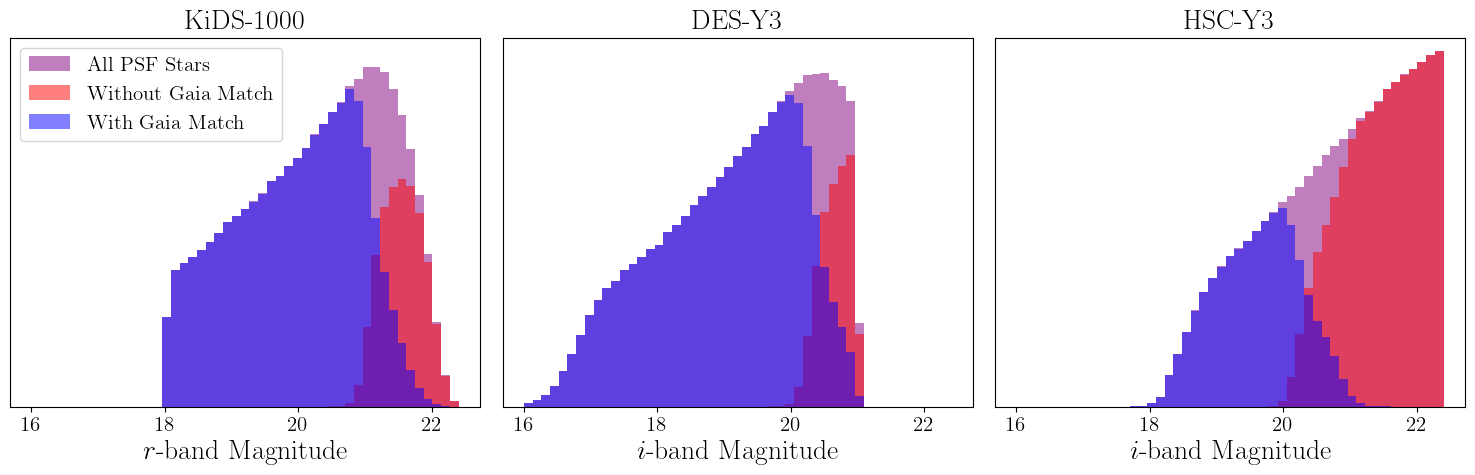

In [15]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

min, max = master_comb_df_kids["mag0"].min(), master_comb_df_kids["mag0"].max()
common_bin = np.linspace(16, 22.4, 50)

# Plot for master_comb_df_kids
match_idx_kids = (master_comb_df_kids["matched"] == 1)
super_match_idx_kids = (master_comb_df_kids[match_idx_kids]["non_single_star"] == 0) & (master_comb_df_kids[match_idx_kids]["in_galaxy_candidates"] == False)
axes[0].hist(master_comb_df_kids["mag0"], bins=common_bin, label="All PSF Stars", alpha=0.5, color="purple")
axes[0].hist(master_comb_df_kids["mag0"][~match_idx_kids], bins=common_bin, label="Without Gaia Match", alpha=0.5, color="red")
axes[0].hist(master_comb_df_kids["mag0"][match_idx_kids][super_match_idx_kids], bins=common_bin, label="With Gaia Match", alpha=0.5, color="blue")
axes[0].set_title("KiDS-1000", fontsize=20)
axes[0].set_xlabel("$r$-band Magnitude", fontsize=20)
#axes[0].set_ylabel(r"Number of Stars / $10^4$", fontsize=20)
axes[0].tick_params(axis='both', which='both', labelsize=15)
axes[0].locator_params(axis='x', nbins=5)
axes[0].locator_params(axis='y', nbins=5)
axes[0].set_yticks([])  # Remove ytick labels
axes[0].set_yticklabels([])  # Remove ytick labels
axes[0].set_ylim(0, 50000)


# Plot for master_comb_df_des
match_idx_des = (master_comb_df_des["matched"] == 1)
super_match_idx_des = (master_comb_df_des[match_idx_des]["non_single_star"] == 0) & (master_comb_df_des[match_idx_des]["in_galaxy_candidates"] == False)
axes[1].hist(master_comb_df_des["mag0"], bins=common_bin, label="All PSF Stars", alpha=0.5, color="purple")
axes[1].hist(master_comb_df_des["mag0"][~match_idx_des], bins=common_bin, label="Without Gaia Match", alpha=0.5, color="red")
axes[1].hist(master_comb_df_des["mag0"][match_idx_des][super_match_idx_des], bins=common_bin, label="With Gaia Match", alpha=0.5, color="blue")
axes[1].set_title(r"DES-Y3", fontsize=20)
axes[1].set_xlabel("$i$-band Magnitude", fontsize=20)
axes[1].tick_params(axis='both', which='both', labelsize=15)
axes[1].locator_params(axis='x', nbins=5)
axes[1].locator_params(axis='y', nbins=5)
axes[1].set_yticks([]) 
axes[1].set_yticklabels([]) 
axes[1].set_ylim(0, 50000)



# Plot for master_comb_df_hsc
match_idx_hsc = (master_comb_df_hsc["matched"] == 1)
super_match_idx_hsc = (master_comb_df_hsc[match_idx_hsc]["non_single_star"] == 0) & (master_comb_df_hsc[match_idx_hsc]["in_galaxy_candidates"] == False)
axes[2].hist(master_comb_df_hsc["mag0"], bins=common_bin, label="All PSF Stars", alpha=0.5, color="purple")
axes[2].hist(master_comb_df_hsc["mag0"][~match_idx_hsc], bins=common_bin, label="Without Gaia Match", alpha=0.5, color="red")
axes[2].hist(master_comb_df_hsc["mag0"][match_idx_hsc][super_match_idx_hsc], bins=common_bin, label="With Gaia Match", alpha=0.5, color="blue")
axes[2].set_title("HSC-Y3", fontsize=20)
axes[2].set_xlabel("$i$-band Magnitude", fontsize=20)
axes[2].tick_params(axis='both', which='both', labelsize=15)
axes[2].locator_params(axis='x', nbins=5)
axes[2].locator_params(axis='y', nbins=5)
axes[2].set_yticks([]) 
axes[2].set_yticklabels([])  
axes[2].set_ylim(0, 50000)
axes[0].legend(fontsize = 15)

plt.tight_layout()
plt.savefig("fig4.png", dpi=400, transparent=True)
plt.show()

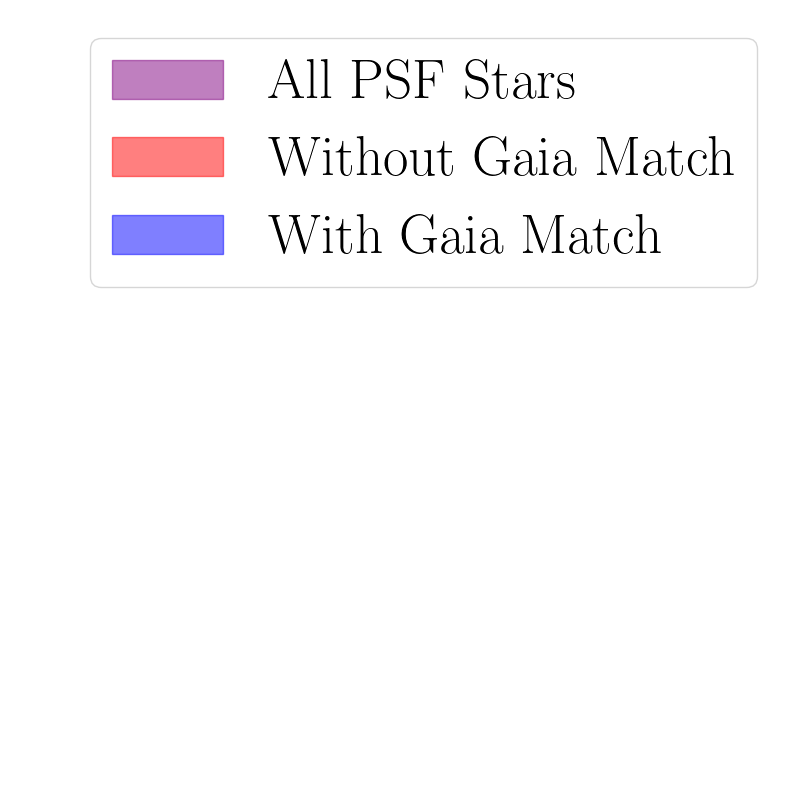

In [16]:
# High-res label if we want to combine in overleaf rather than matplotlib

import matplotlib.patches as mpatches

plt.figure(figsize = (10, 10))
plt.axis('off')

# Create empty patches
all_stars_patch = mpatches.Patch(color='purple', label='All PSF Stars', alpha=0.5)
without_match_patch = mpatches.Patch(color='red', label='Without Gaia Match', alpha=0.5)
with_match_patch = mpatches.Patch(color='blue', label='With Gaia Match', alpha=0.5)

# Create legend with the patches
plt.legend(handles=[all_stars_patch, without_match_patch, with_match_patch], fontsize = 40)
plt.savefig("legend.png", dpi=400, transparent=True)